In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np
import seaborn as sns
import random
import ipywidgets as widgets
from IPython.display import display



%matplotlib inline
sns.set_style('darkgrid')

In [41]:
flight_data = pd.read_csv('Smoothed_data.csv')

In [42]:
flight_data.dropna(inplace=True)

In [43]:
flight_data

,Route,Airline,FlightNum,Aircraft,Date,Time,Latitude,Longitude,Course,Kts,mph,feet,Rate,Reporting Facility
0,TLV - ADB,Pegasus Airlines,PC812,A320,18/07/2023,Tue 01:45:23 PM,32.0116,34.8535,← 258°,143.0,165.0,"1,700",,FlightAware ADS-B (LLEK)
1,TLV - ADB,Pegasus Airlines,PC812,A320,18/07/2023,Tue 01:45:39 PM,32.0092,34.8417,← 256°,143.0,165.0,"2,375","2,578",FlightAware ADS-B (LLHS)
2,TLV - ADB,Pegasus Airlines,PC812,A320,18/07/2023,Tue 01:45:55 PM,32.0064,34.8287,← 256°,145.0,167.0,"3,075","2,438",FlightAware ADS-B (TLV / LLBG)
3,TLV - ADB,Pegasus Airlines,PC812,A320,18/07/2023,Tue 01:46:11 PM,32.0036,34.8158,← 256°,156.0,180.0,"3,675","2,063",FlightAware ADS-B (TLV / LLBG)
4,TLV - ADB,Pegasus Airlines,PC812,A320,18/07/2023,Tue 01:46:27 PM,32.0007,34.8023,← 256°,174.0,200.0,"4,175","1,866",FlightAware ADS-B (TLV / LLBG)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47181,TLV - ZTH,El Al,LY5039,B738,17/07/2023,Mon 04:30:04 PM,37.6287,20.9269,↑ 344°,160.0,184.0,"2,175",-443,FlightAware ADS-B (EFL / LGKF)
47182,TLV - ZTH,El Al,LY5039,B738,17/07/2023,Mon 04:30:34 PM,37.6499,20.9192,↑ 344°,155.0,178.0,"1,900",-625,FlightAware ADS-B (EFL / LGKF)
47183,TLV - ZTH,El Al,LY5039,B738,17/07/2023,Mon 04:30:52 PM,37.6619,20.9150,↑ 344°,145.0,167.0,"1,675",-780,FlightAware ADS-B (GPA / LGRX)
47184,TLV - ZTH,El Al,LY5039,B738,17/07/2023,Mon 04:32:35 PM,37.7249,20.8939,↑ 344°,141.0,162.0,425,-724,FlightAware ADS-B (EFL / LGKF)


In [44]:
grouped_df = flight_data.groupby(['Route','Airline','FlightNum','Aircraft','Date']).agg(lambda x: x.tolist()).reset_index()

In [45]:
grouped_df['Sequence'] = grouped_df.apply(lambda row: list(zip(row['Latitude'], row['Longitude'])), axis=1)

In [46]:
grouped_df.drop(['Latitude', 'Longitude','Course','Reporting Facility'], axis=1, inplace=True)

In [47]:
grouped_df.head()

,Route,Airline,FlightNum,Aircraft,Date,Time,Kts,mph,feet,Rate,Sequence
0,TLV - ADB,Pegasus Airlines,PC812,A320,18/07/2023,"[Tue 01:45:23 PM, Tue 01:45:39 PM, Tue 01:45:5...","[143.0, 143.0, 145.0, 156.0, 174.0, 210.0, 231...","[165.0, 165.0, 167.0, 180.0, 200.0, 242.0, 266...","[1,700, 2,375, 3,075, 3,675, 4,175, 4,950, 5,5...","[ , 2,578, 2,438, 2,063, 1,866, 1,976, 1,922, ...","[(32.0116, 34.8535), (32.0092, 34.8417), (32.0..."
1,TLV - ADD,Ethiopian Airlines,ETH415,B38M,17/07/2023,"[Mon 10:26:34 AM, Mon 10:26:50 AM, Mon 10:27:0...","[175.0, 176.0, 176.0, 183.0, 190.0, 200.0, 208...","[201.0, 203.0, 203.0, 211.0, 219.0, 230.0, 239...","[1,050, 1,675, 2,250, 2,675, 3,475, 3,800, 4,1...","[ , 2,250, 1,875, 1,670, 1,534, 1,136, 1,029, ...","[(32.0114, 32.01140169), (32.0114, 32.01140877..."
2,TLV - AMM,Royal Jordanian,RJ341,E75L,17/07/2023,"[Mon 12:29:21 AM, Mon 12:29:37 AM, Mon 12:29:5...","[151.0, 153.0, 156.0, 158.0, 163.0, 179.0, 226...","[174.0, 176.0, 180.0, 182.0, 188.0, 206.0, 260...","[750, 1,475, 2,175, 2,825, 3,400, 3,875, 4,225...","[ , 2,672, 2,531, 2,297, 1,969, 1,238, 1,500, ...","[(32.014, 34.8686), (32.0117, 34.8557), (32.00..."
3,TLV - AMS,El Al,LY337,A320,28/06/2023,"[Fri 07:36:11 AM, Fri 07:36:27 AM, Fri 07:36:4...","[176.0, 179.0, 178.0, 177.0, 178.0, 181.0, 202...","[203.0, 206.0, 205.0, 204.0, 205.0, 208.0, 232...","[550, 1,150, 1,825, 2,350, 2,850, 3,425, 3,675...","[ , 2,391, 2,250, 1,922, 1,843, 1,303, 750, 1,...","[(32.012, 34.8559), (32.0091, 34.8405), (32.00..."
4,TLV - ARN,Norwegian Air Sweden,NSZ4612,B738,6/7/2023,"[Thu 09:29:12 PM, Thu 09:29:45 PM, Thu 09:30:0...","[186.0, 190.0, 204.0, 226.0, 242.0, 260.0, 270...","[214.0, 219.0, 235.0, 260.0, 278.0, 299.0, 311...","[2,675, 3,775, 4,000, 4,375, 4,725, 5,000, 5,9...","[ , 1,622, 1,059, 1,145, 1,014, 1,532, 1,950, ...","[(31.9999, 34.7949), (31.9928, 34.7646), (31.9..."


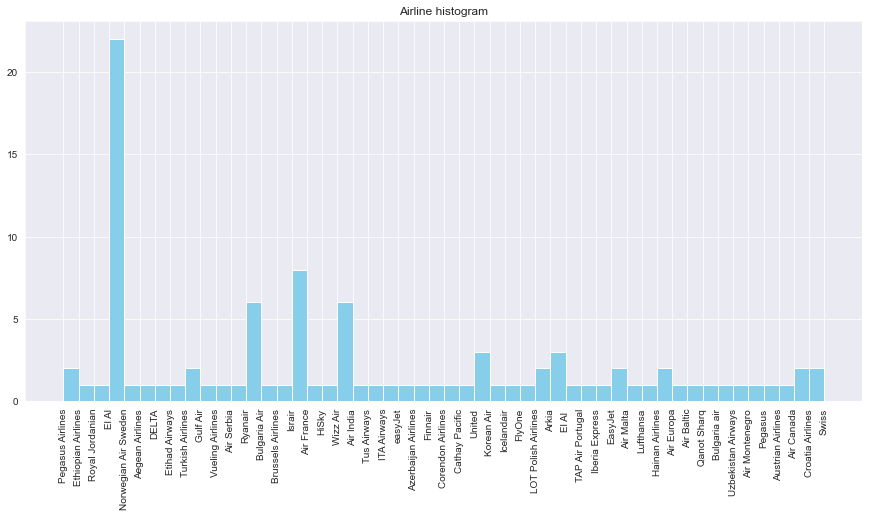

In [48]:
plt.figure(figsize = (15,7))
plt.hist('Airline',data = grouped_df,bins = 50,color='skyblue')
plt.title('Airline histogram')
plt.xticks(rotation = 90)
plt.show()

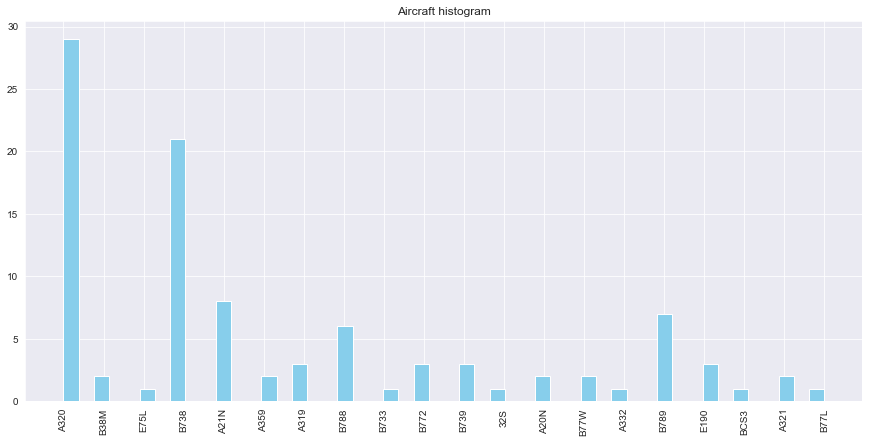

In [49]:
plt.figure(figsize = (15,7))
plt.hist('Aircraft',data = grouped_df,bins = 50,color='skyblue')
plt.title('Aircraft histogram')
plt.xticks(rotation = 90)
plt.show()

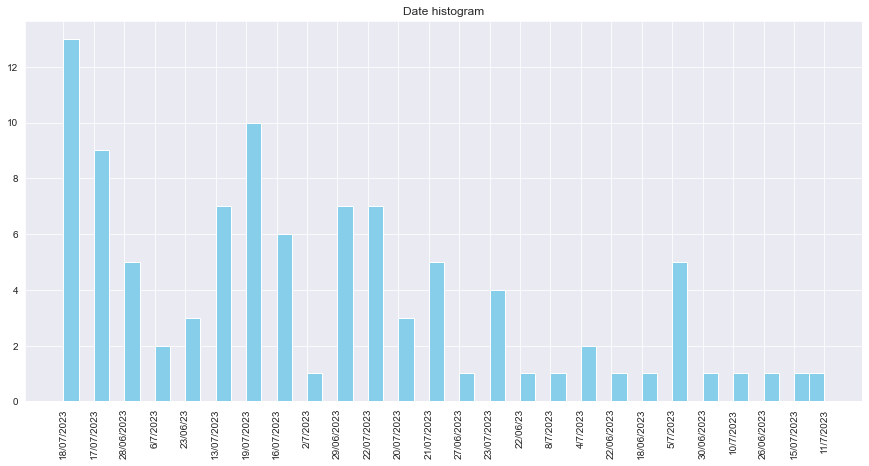

In [50]:
plt.figure(figsize = (15,7))
plt.hist('Date',data = grouped_df,bins = 50,color='skyblue')
plt.title('Date histogram')
plt.xticks(rotation = 90)
plt.show()

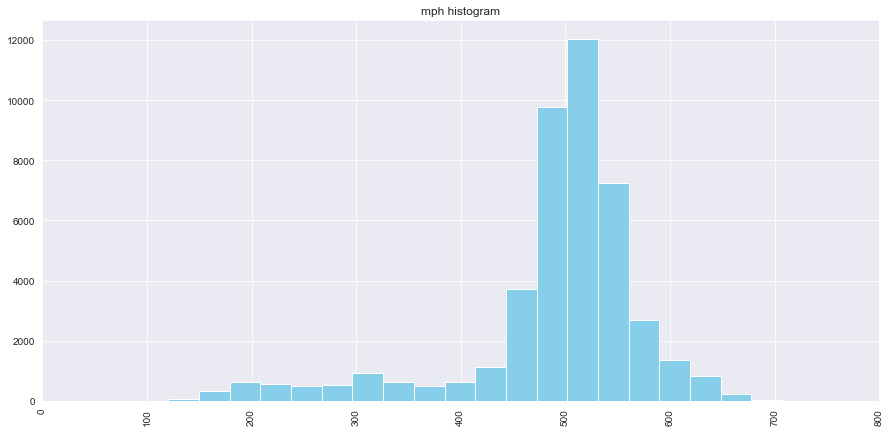

In [51]:
plt.figure(figsize = (15,7))
plt.hist('mph',data = flight_data,bins = 50,color='skyblue')
plt.title('mph histogram')
plt.xlim(0,800)
plt.xticks(rotation = 90)
plt.show()